In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
test_data = '/content/drive/MyDrive/Taiwo/msc_testing_dataset.csv'
train_data = '/content/drive/MyDrive/Taiwo/msc_training_dataset.csv'

In [3]:
df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

In [4]:
df_train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [5]:
df_test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [7]:
df_train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [8]:
df_test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [11]:
x_train = df_train.drop('price', axis=1)
x_test = df_test.drop('price', axis=1)
y_train = df_train['price']
y_test = df_test['price']

In [12]:
from sklearn.model_selection import GridSearchCV
# define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


This code performs a grid search over a range of hyperparameters for a Random Forest Regression model. It uses the GridSearchCV function from scikit-learn to perform the grid search and find the best hyperparameters that maximize the performance of the model on the training set.

After finding the best hyper

In [13]:
# create a Random Forest Regression model
rf = RandomForestRegressor(random_state=42)

# perform a grid search over the parameter grid
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [14]:
# print the best hyperparameters and the best score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2f}")

# evaluate the model on the testing set
test_score = grid_search.score(x_test, y_test)
print(f"Testing score: {test_score:.2f}")

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best score: 0.99
Testing score: 0.99


In [15]:
best_estimators = grid_search.best_estimator_

In [16]:
# make predictions on the data
predictions = best_estimators.predict(x_test)

# add the predictions to the data as a new column
df_test["predicted_price"] = predictions

# print the first 10 rows of the data with the predicted prices
print(df_test.head(10))

   room  bathroom  kitchen  french_door  backyard  furnished  green_paint  \
0     1         1        1            3         0          0            1   
1     5         1        1            2         0          0            0   
2     5         1        1            3         0          0            0   
3     4         2        2            1         0          1            1   
4     5         2        1            1         0          1            1   
5     5         1        1            2         1          1            1   
6     5         1        2            3         0          0            1   
7     2         1        2            1         0          1            1   
8     2         1        1            3         1          1            1   
9     1         1        1            3         1          0            0   

   solar_power  woodfloor  qlm_security  club_access  price  predicted_price  
0            1          0             1            0   5068          5329

In [21]:
# Get the feature importances
importances = best_estimators.feature_importances_

# Print the feature importances
for feature, importance in zip(x_test.columns, importances):
    print(f'{feature}: {importance}')

room: 0.42946718591544625
bathroom: 0.004675980168689005
kitchen: 0.011148946228914826
french_door: 0.008836644509868381
backyard: 0.014603587148728822
furnished: 0.19745788944080445
green_paint: 0.006836548855809861
solar_power: 0.11437064217880999
woodfloor: 0.17769557587529353
qlm_security: 0.008865048094901662
club_access: 0.026041951582733296


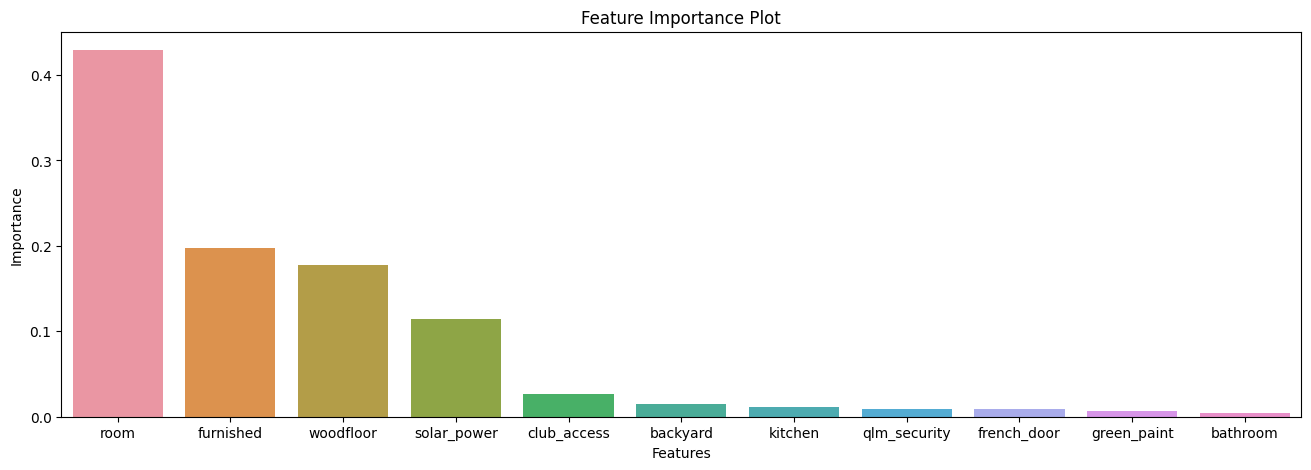

In [22]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_test.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(16, 5))
sns.barplot(x=names, y=importances[indices])
plt.title("Feature Importance Plot")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
